<a href="https://colab.research.google.com/github/Mokhan02/DummyNeuralNetwork/blob/main/NNM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer(4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) --> output (3 classes of iris flower)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # Initiating our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [4]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of a Model
model = Model()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [7]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

/tmp/ipython-input-973526484.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [9]:
# Train Test Split
X = my_df.drop('species', axis=1).values
y = my_df['species'].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [12]:
# Convert X and Y features to float tensors and long tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [13]:
# Set the criterion of the model to measure the error
criterion = nn.CrossEntropyLoss()
# Choose an optimizer, lr = learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [14]:
# Train our model
epochs = 200
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train)
  # Calculate the loss between the predictions and the labels
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.1095242500305176
Epoch: 20 and loss: 1.0960756540298462
Epoch: 30 and loss: 1.0845398902893066
Epoch: 40 and loss: 1.073915719985962
Epoch: 50 and loss: 1.0637413263320923
Epoch: 60 and loss: 1.0538722276687622
Epoch: 70 and loss: 1.0440350770950317
Epoch: 80 and loss: 1.0337213277816772
Epoch: 90 and loss: 1.0227365493774414
Epoch: 100 and loss: 1.0096259117126465
Epoch: 110 and loss: 0.9954349398612976
Epoch: 120 and loss: 0.9828447103500366
Epoch: 130 and loss: 0.9664683938026428
Epoch: 140 and loss: 0.9485272169113159
Epoch: 150 and loss: 0.9305612444877625
Epoch: 160 and loss: 0.9112032651901245
Epoch: 170 and loss: 0.8891754150390625
Epoch: 180 and loss: 0.8652693629264832
Epoch: 190 and loss: 0.8407701253890991


Text(0.5, 0, 'Epochs')

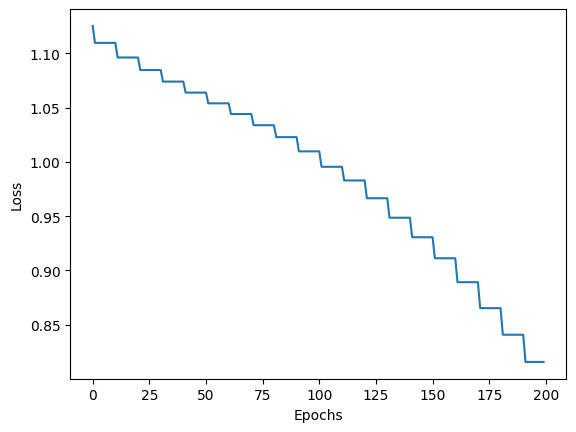

In [15]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [16]:
# Evaluate model on test data set
with torch.no_grad(): # turn off backpropagation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)


In [17]:
loss

tensor(0.8380)

In [21]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1}.) {str(y_val)} \t {y_test[i]}')

    # correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} correct!')

1.) tensor([-0.0807,  0.4167,  0.7721]) 	 2
2.) tensor([-0.1754,  0.4203,  1.0827]) 	 2
3.) tensor([-0.2581,  0.4409,  1.2694]) 	 2
4.) tensor([-0.0497,  0.4270,  0.6181]) 	 1
5.) tensor([-0.1819,  0.4300,  1.0584]) 	 2
6.) tensor([0.0173, 0.4148, 0.4631]) 	 1
7.) tensor([-0.1083,  0.4245,  0.8303]) 	 2
8.) tensor([-0.0595,  0.4286,  0.6434]) 	 1
9.) tensor([-0.1481,  0.4273,  0.9543]) 	 2
10.) tensor([-0.2212,  0.4278,  1.2045]) 	 2
11.) tensor([-0.1036,  0.4239,  0.8164]) 	 2
12.) tensor([ 0.4776,  0.2702, -0.3206]) 	 0
13.) tensor([ 0.4618,  0.2832, -0.3428]) 	 0
14.) tensor([0.1168, 0.3928, 0.2237]) 	 1
15.) tensor([ 0.4087,  0.2933, -0.2164]) 	 0
16.) tensor([-0.0971,  0.4280,  0.7735]) 	 2
17.) tensor([ 0.4533,  0.2813, -0.3055]) 	 0
18.) tensor([-0.0960,  0.4202,  0.8076]) 	 1
19.) tensor([ 0.4745,  0.2741, -0.3329]) 	 0
20.) tensor([ 0.4387,  0.2931, -0.3222]) 	 0
21.) tensor([0.0803, 0.4004, 0.3145]) 	 1
22.) tensor([-0.2126,  0.4304,  1.1627]) 	 2
23.) tensor([ 0.4079,  0.293

In [22]:
new_iris = torch.tensor([4.7,3.2,1.3, 0.2])

In [23]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 0.4761,  0.2754, -0.3448])


In [24]:
# Saving our NN Model
torch.save(model.state_dict(), 'my_first_NNModel.pt')

In [25]:
# Loading the saved model
new_model = Model()
new_model.load_state_dict(torch.load('my_first_NNModel.pt'))

<All keys matched successfully>

In [27]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)